<a href="https://colab.research.google.com/github/0803032006/Analysis-of-Mall-Customer-Data-Using-Logistic-Regression-in-Snowflake1/blob/main/Analysis_of_Mall_Customer_Data_Using_Logistic_Regression_in_Snowflake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 4.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyOpenSSL
    Found

In [3]:
import pandas as pd
import snowflake.connector
conn=snowflake.connector.connect(
    user="Shalini",
    password="uzQyvW9iQX4WrB2",
    account="GJYFCLT-MN78345",
    database="MALL_LINEAR",
    schema="PUBLIC",
    warehouse="COMPUTE_WH"
)
# STEP 2:run query fetch data
query='SELECT * FROM "MALL_ANALYSIS"'
df=pd.read_sql(query,conn)
# step3:close
conn.close()
# step 4
print(df.head())






/tmp/ipython-input-879245743.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


   CUSTOMERID   GENRE  AGE  Annual_Income_(k$)  SPENDING_SCORE
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [10]:
df.isnull().sum()

,0
CUSTOMERID,0
GENRE,0
AGE,0
Annual_Income_(k$),0
SPENDING_SCORE,0


In [11]:
x=df["CUSTOMERID"]
y=df['SPENDING_SCORE']

In [12]:
print(x)

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CUSTOMERID, Length: 200, dtype: int64


In [13]:
print(y)

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: SPENDING_SCORE, Length: 200, dtype: int64


In [14]:
df.describe()

,CUSTOMERID,AGE,Annual_Income_(k$),SPENDING_SCORE
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [17]:
print(x_train, x_test, y_train, y_test)

79      80
197    198
38      39
24      25
122    123
      ... 
106    107
14      15
92      93
179    180
102    103
Name: CUSTOMERID, Length: 160, dtype: int64 95      96
15      16
30      31
158    159
128    129
115    116
69      70
170    171
174    175
45      46
66      67
182    183
165    166
78      79
186    187
177    178
56      57
152    153
82      83
68      69
124    125
16      17
148    149
93      94
65      66
60      61
84      85
67      68
125    126
132    133
9       10
18      19
55      56
75      76
150    151
104    105
135    136
137    138
164    165
76      77
Name: CUSTOMERID, dtype: int64 79     42
197    74
38     26
24     14
122    58
       ..
106    50
14     13
92     49
179    90
102    59
Name: SPENDING_SCORE, Length: 160, dtype: int64 95     52
15     79
30      4
158     1
128    11
115    50
69     47
170    13
174    13
45     65
66     50
182    15
165    75
78     52
186    24
177    69
56     50
152    20
82     41
68     59
124   

In [20]:
model = LinearRegression()
model.fit(x_train.to_frame(), y_train)

LinearRegression()

In [25]:
y_pred = model.predict(x_test.to_frame())
print(y_pred)

[51.63441076 48.87437664 49.39188304 53.80793763 52.77292484 52.32441929
 50.73739967 54.22194275 54.35994445 49.90938944 50.63389839 54.63594786
 54.04944061 51.04790351 54.77394957 54.46344573 50.28889413 53.60093507
 51.18590522 50.70289925 52.63492313 48.90887707 53.46293336 51.56540991
 50.59939797 50.42689584 51.25490607 50.66839882 52.66942356 52.91092654
 48.66737409 48.97787792 50.2543937  50.94440223 53.53193422 51.9449146
 53.01442782 53.08342867 54.01494019 50.97890266]


In [22]:
print("Slope (m):", model.coef_)
print("Intercept (c):", model.intercept_)


Slope (m): [0.03450043]
Intercept (c): 48.322369821265426


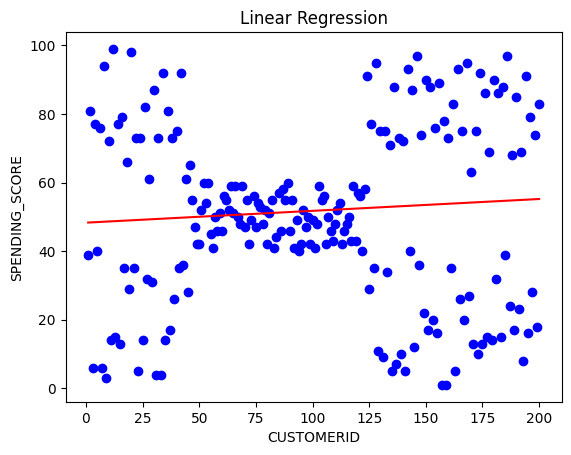

In [27]:
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x.to_frame()), color='red')
plt.xlabel("CUSTOMERID")
plt.ylabel("SPENDING_SCORE")
plt.title("Linear Regression")
plt.show()